# ***Install Bibio Kaggle & imblearn***

In [311]:
!pip install kaggle
!pip install imblearn

# ***install data from Kaggle***

In [312]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-data-set' dataset.
Path to dataset files: /kaggle/input/diabetes-data-set


# ***Bibio***

In [313]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# ***Data***

In [314]:
# قراءة ملف CSV من المسار
data = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")

# **Explore Data**

In [315]:
# عرض أول 5 أسطر
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [317]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [318]:
data.duplicated().sum()

np.int64(0)

# ***Analysis***

In [319]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

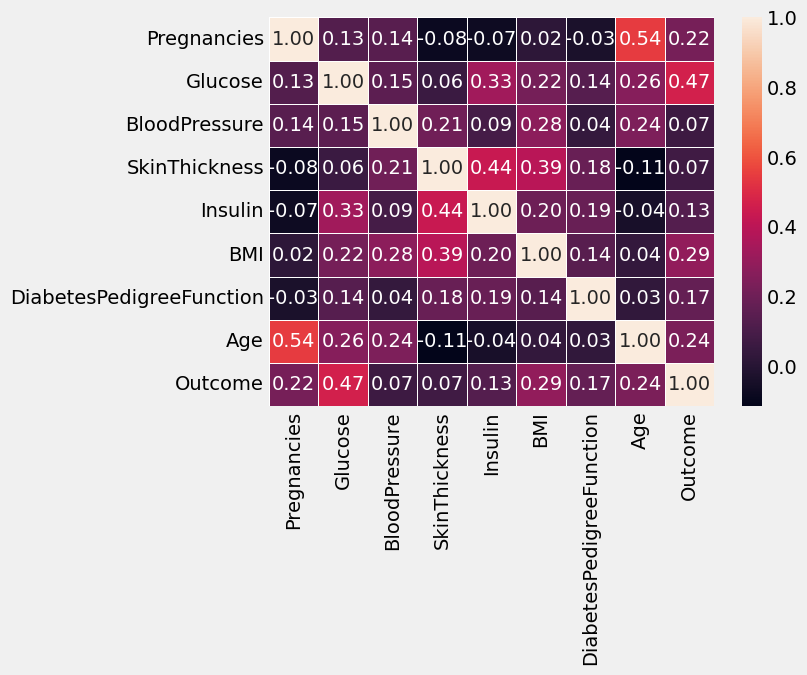

In [320]:
sns.heatmap(data.corr(), annot=True , fmt='0.2f', linewidths=.5)

<Axes: xlabel='Outcome', ylabel='count'>

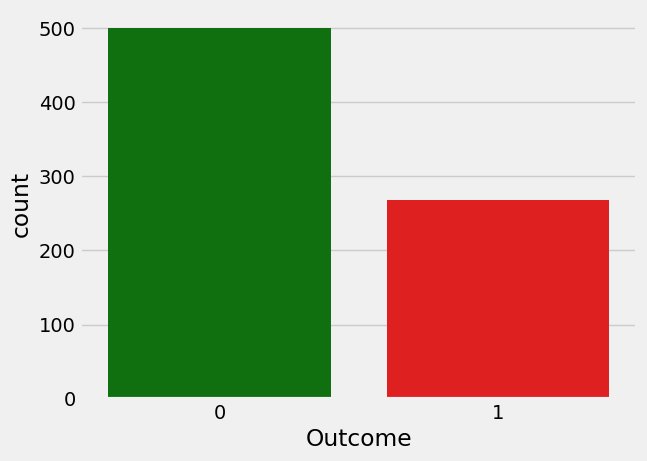

In [321]:
sns.countplot(x='Outcome', data=data, palette=['g','r'])

In [322]:
maxi = data[data['Outcome']==0]
mini = data[data['Outcome']==1]
maxi.shape , mini.shape
268/768

0.3489583333333333

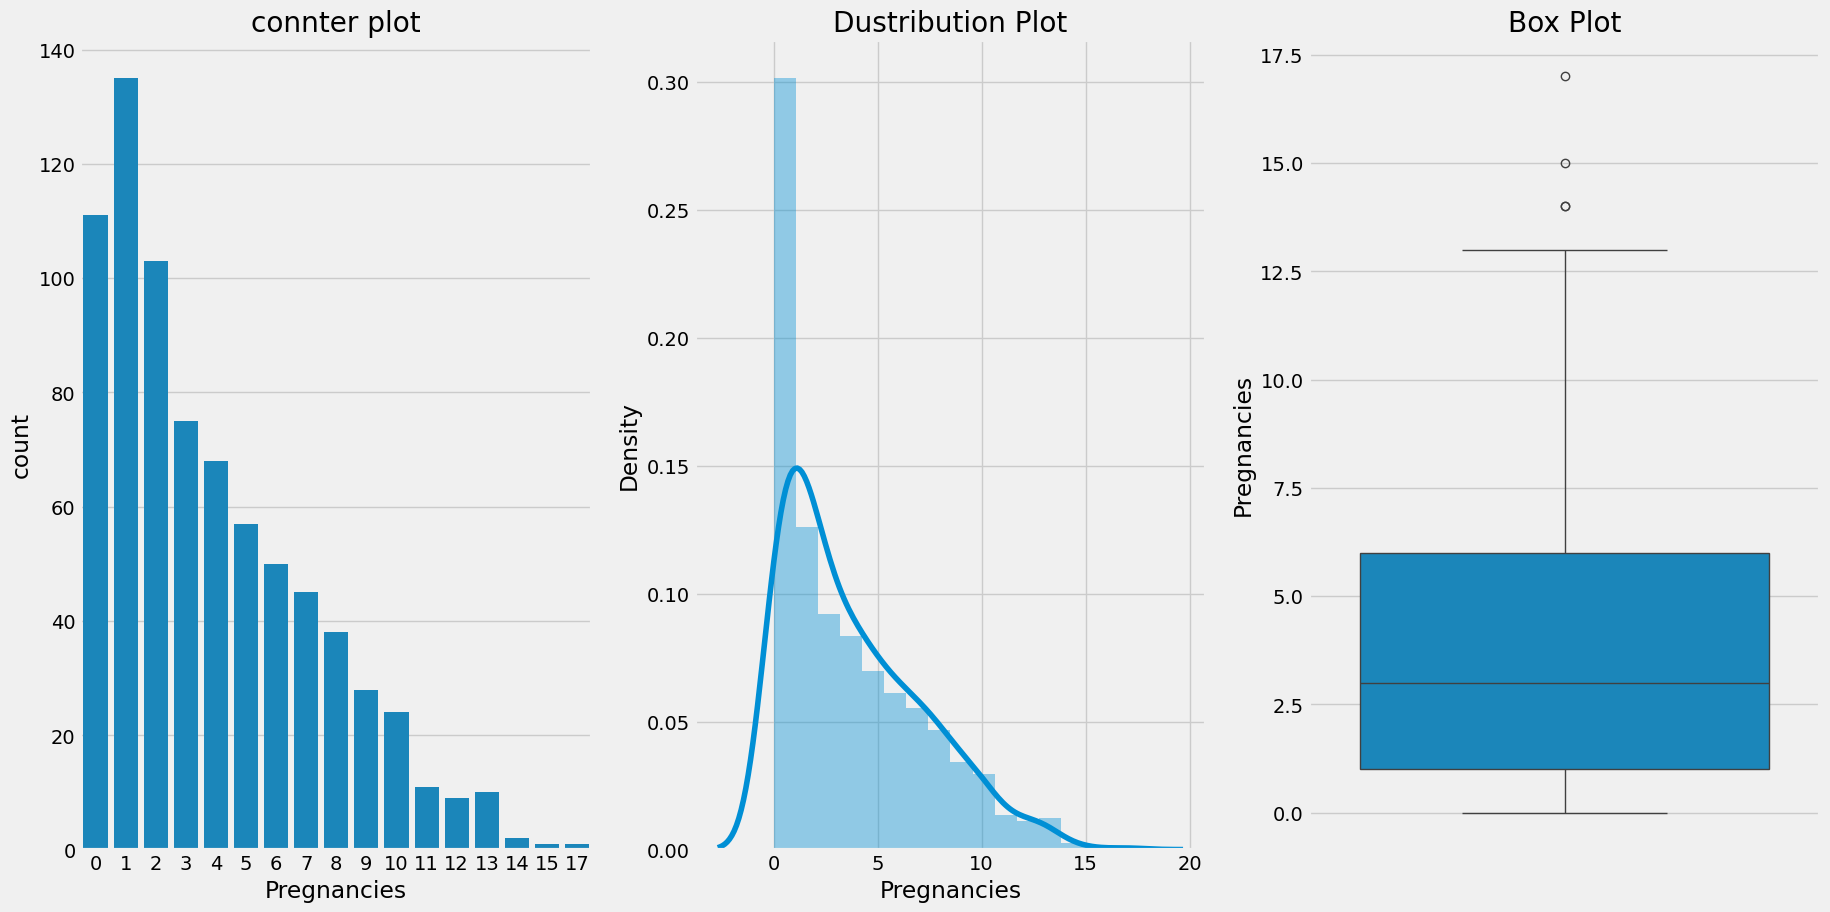

In [323]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title('connter plot')
sns.countplot(x='Pregnancies', data=data)

plt.subplot(1,3,2)
plt.title('Dustribution Plot')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data['Pregnancies'])
plt.show()

<Axes: ylabel='Age'>

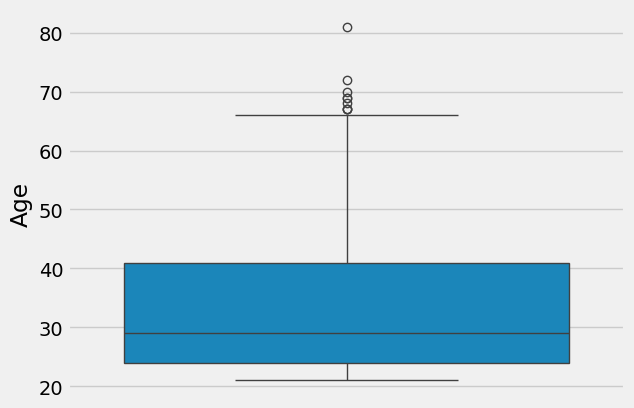

In [324]:
sns.boxplot(data.Age)

# ***Create Model***

*divise data from features(x) and labal(y)*

In [386]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [387]:
rm = RandomOverSampler(random_state=41)
x_res ,y_res = rm.fit_resample(x,y)
print('old data setshape : {}'.format(Counter(y)))
print('new data setshape : {}'.format(Counter(y_res)))

old data setshape : Counter({0: 500, 1: 268})
new data setshape : Counter({1: 500, 0: 500})


*divise to train and test*

In [388]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.2,  random_state=42)

*train model*

In [389]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier(n_estimators= 500, class_weight='balanced')
model4 = GradientBoostingClassifier(n_estimators= 1000)

In [390]:
colums = ['LogisticRegression',
          'SVC',
          'RandomForestClassifier',
          'GradientBoostingClassifier']

result1 =[]
result2 =[]
result3 =[]

In [391]:
def cal(model):
  model.fit(x_train, y_train)

  pre = model.predict(x_test)

  accuracy = accuracy_score(y_test, pre)
  recall = recall_score(y_test, pre)
  f1 = f1_score(y_test, pre)

  result1.append(accuracy)
  result2.append(recall)
  result3.append(f1)

  sns.heatmap(confusion_matrix(y_test, pre), annot=True, fmt='g')
  print(model)
  print('accuracy is', accuracy)
  print('recall is', recall)
  print('f1 is', f1)

LogisticRegression()
accuracy is 0.715
recall is 0.6831683168316832
f1 is 0.7076923076923077


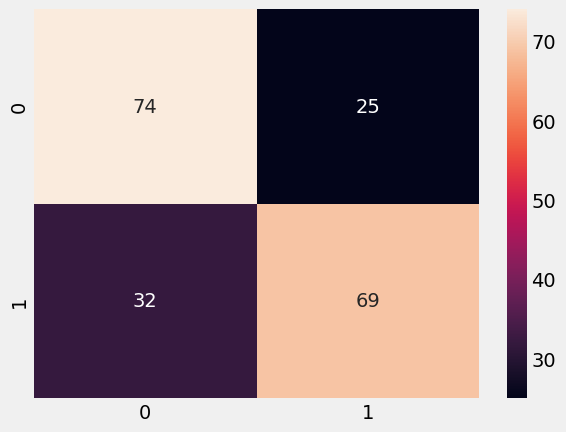

In [392]:
cal(model1)

SVC()
accuracy is 0.705
recall is 0.6435643564356436
f1 is 0.6878306878306878


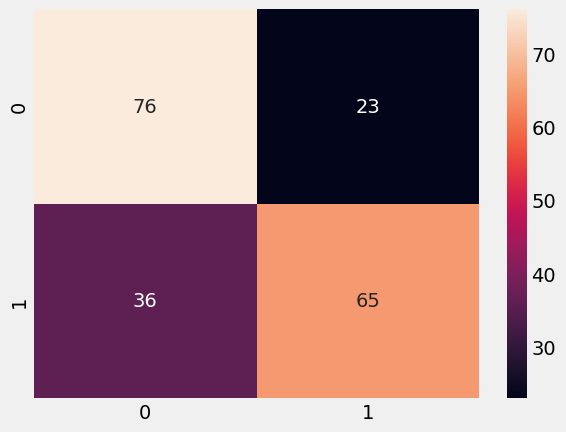

In [393]:
cal(model2)

RandomForestClassifier(class_weight='balanced', n_estimators=500)
accuracy is 0.85
recall is 0.900990099009901
f1 is 0.8584905660377359


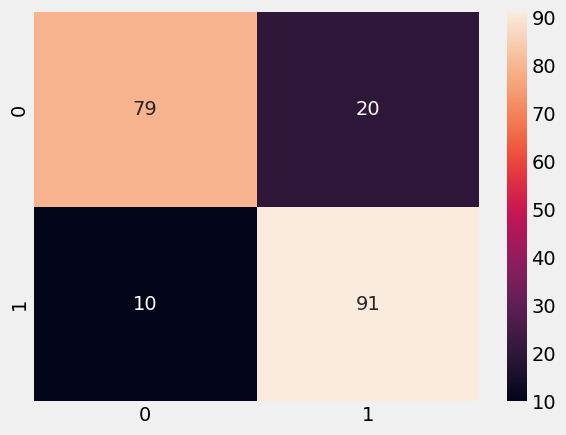

In [394]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is 0.795
recall is 0.8712871287128713
f1 is 0.8110599078341014


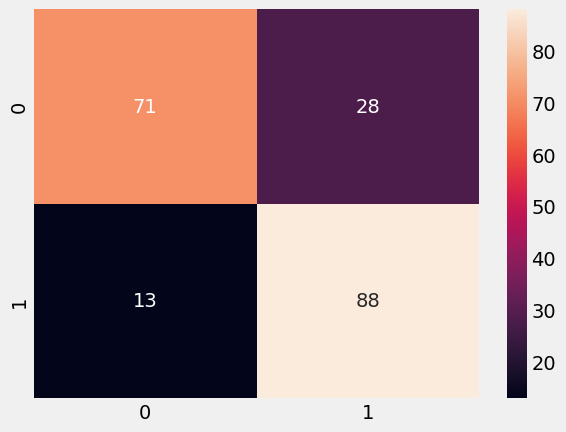

In [395]:
cal(model4)

In [396]:
FinalResult = pd.DataFrame({'Algo': colums ,
              'Accuracies': result1,
              'Recall': result2,
              'FSorce': result3})

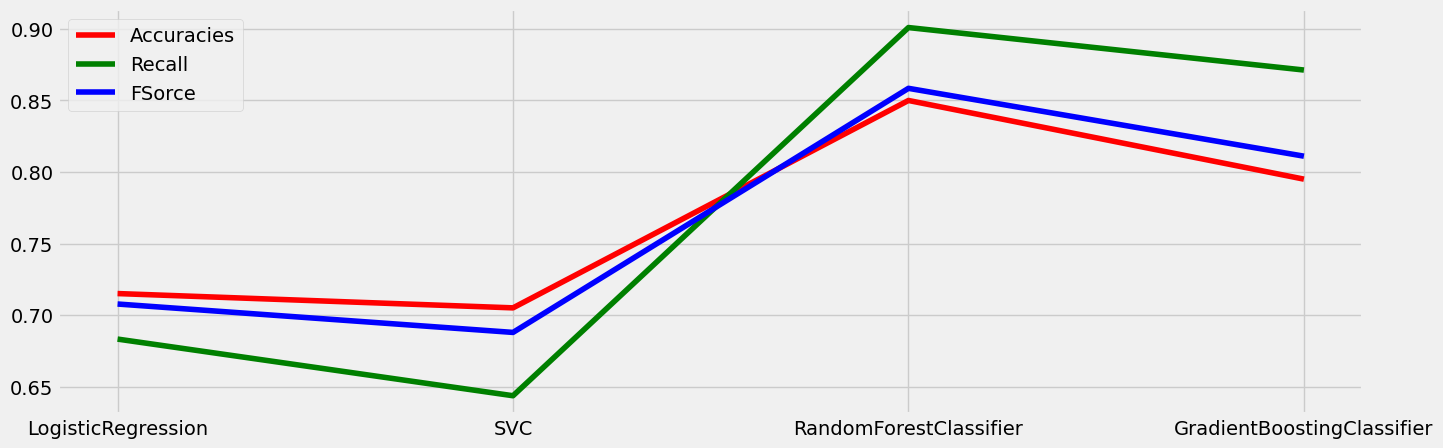

In [397]:
fig, ax = plt.subplots(figsize= (15,5))
plt.plot(FinalResult.Algo, result1, color='r', label='Accuracies')
plt.plot(FinalResult.Algo, result2, color='g', label='Recall')
plt.plot(FinalResult.Algo, result3, color='b', label='FSorce')

plt.legend()
plt.show()